# EDA et modélisation:

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 

In [2]:
data = pd.read_csv('D:/fdec-project/Projet Final FDEC 2020-2021-20210103/RUN_solar_data_EGC_OpenChallenge/Moufia_2014_2015/moufia_2014_2015.csv',index_col='Timestamp',parse_dates=True )

In [3]:
data.head()

,FD_Avg,FG_Avg,Patm_Avg,RH_Avg,Text_Avg,WD_MeanUnitVector,WS_Mean
Timestamp,,,,,,,
2014-01-01 00:00:00,7.999,1.759,973.1667,68.56667,24.60000,100.99800,4.616667
2014-01-01 00:01:00,1.361,4.084,973.1667,68.71667,24.58333,94.43468,3.750000
2014-01-01 00:02:00,3.574,6.297,973.1500,68.83333,24.51666,97.81310,5.583333
2014-01-01 00:03:00,5.673,2.212,973.1166,69.15000,24.50000,92.55701,5.300000
2014-01-01 00:04:00,1.588,6.524,973.0999,69.33334,24.50000,98.83556,4.650000


In [4]:
data.isna().sum() # pas de valeurs manquantes

FD_Avg               0
FG_Avg               0
Patm_Avg             0
RH_Avg               0
Text_Avg             0
WD_MeanUnitVector    0
WS_Mean              0
dtype: int64

#### Puisque le nombre des observations est supérieur à 30 alors par le théorème central limite, la distribution tends vers une loi normale ainsi on peut detecter les valeurs extrêmes en utilisant les Z_score.

In [5]:
data['z_scoreRH'] = (data['RH_Avg'] - data['RH_Avg'].mean())/data['RH_Avg'].std()
data['z_scoreFD'] = (data['FD_Avg'] - data['FD_Avg'].mean())/data['FD_Avg'].std()
data['z_scoreFG'] = (data['FG_Avg'] - data['FG_Avg'].mean())/data['FG_Avg'].std()
data['z_scorePatm'] = (data['Patm_Avg'] - data['Patm_Avg'].mean())/data['Patm_Avg'].std()
data['z_scoreText'] = (data['Text_Avg'] - data['Text_Avg'].mean())/data['Text_Avg'].std()
data['z_scoreWS'] = (data['WS_Mean'] - data['WS_Mean'].mean())/data['WS_Mean'].std()
data['z_scoreWD'] = (data['WD_MeanUnitVector'] - data['WD_MeanUnitVector'].mean())/data['WD_MeanUnitVector'].std()

In [6]:
data.head()

,FD_Avg,FG_Avg,Patm_Avg,RH_Avg,Text_Avg,WD_MeanUnitVector,WS_Mean,z_scoreRH,z_scoreFD,z_scoreFG,z_scorePatm,z_scoreText,z_scoreWS,z_scoreWD
Timestamp,,,,,,,,,,,,,,
2014-01-01 00:00:00,7.999,1.759,973.1667,68.56667,24.60000,100.99800,4.616667,0.274958,-0.511143,-0.611588,-1.062349,0.825684,0.751748,-0.622357
2014-01-01 00:01:00,1.361,4.084,973.1667,68.71667,24.58333,94.43468,3.750000,0.290371,-0.546750,-0.605512,-1.062349,0.818831,0.320463,-0.703318
2014-01-01 00:02:00,3.574,6.297,973.1500,68.83333,24.51666,97.81310,5.583333,0.302358,-0.534879,-0.599730,-1.066374,0.791425,1.232797,-0.661644
2014-01-01 00:03:00,5.673,2.212,973.1166,69.15000,24.50000,92.55701,5.300000,0.334897,-0.523620,-0.610404,-1.074423,0.784576,1.091800,-0.726480
2014-01-01 00:04:00,1.588,6.524,973.0999,69.33334,24.50000,98.83556,4.650000,0.353736,-0.545532,-0.599137,-1.078447,0.784576,0.768336,-0.649031


#### On va éliminer les outliers car on a le nombre d'observations >> le nombre d'attributs

In [7]:
test = data.copy()

In [8]:
test = test[(test['z_scoreRH']<3)&(test['z_scoreRH']>-3)]

In [9]:
test = test[(test['z_scoreFD']<3)&(test['z_scoreFD']>-3)]

In [10]:
test = test[(test['z_scoreFG']<3)&(test['z_scoreFG']>-3)]

In [11]:
test = test[(test['z_scorePatm']<3)&(test['z_scorePatm']>-3)]

In [12]:
test = test[(test['z_scoreText']<3)&(test['z_scoreText']>-3)]

In [13]:
test = test[(test['z_scoreWS']<3)&(test['z_scoreWS']>-3)]

In [14]:
test = test[(test['z_scoreWD']<3)&(test['z_scoreWD']>-3)]

In [15]:
test.shape # le nombre d'observation a diminué

(992163, 14)

In [16]:
test.head()

,FD_Avg,FG_Avg,Patm_Avg,RH_Avg,Text_Avg,WD_MeanUnitVector,WS_Mean,z_scoreRH,z_scoreFD,z_scoreFG,z_scorePatm,z_scoreText,z_scoreWS,z_scoreWD
Timestamp,,,,,,,,,,,,,,
2014-01-01 00:00:00,7.999,1.759,973.1667,68.56667,24.60000,100.99800,4.616667,0.274958,-0.511143,-0.611588,-1.062349,0.825684,0.751748,-0.622357
2014-01-01 00:01:00,1.361,4.084,973.1667,68.71667,24.58333,94.43468,3.750000,0.290371,-0.546750,-0.605512,-1.062349,0.818831,0.320463,-0.703318
2014-01-01 00:02:00,3.574,6.297,973.1500,68.83333,24.51666,97.81310,5.583333,0.302358,-0.534879,-0.599730,-1.066374,0.791425,1.232797,-0.661644
2014-01-01 00:03:00,5.673,2.212,973.1166,69.15000,24.50000,92.55701,5.300000,0.334897,-0.523620,-0.610404,-1.074423,0.784576,1.091800,-0.726480
2014-01-01 00:04:00,1.588,6.524,973.0999,69.33334,24.50000,98.83556,4.650000,0.353736,-0.545532,-0.599137,-1.078447,0.784576,0.768336,-0.649031


In [17]:
test.drop(columns = ['z_scoreRH', 'z_scoreFD', 'z_scoreFG','z_scorePatm', 'z_scoreText','z_scoreWS', 'z_scoreWD'], inplace = True)

In [18]:
test.head()

,FD_Avg,FG_Avg,Patm_Avg,RH_Avg,Text_Avg,WD_MeanUnitVector,WS_Mean
Timestamp,,,,,,,
2014-01-01 00:00:00,7.999,1.759,973.1667,68.56667,24.60000,100.99800,4.616667
2014-01-01 00:01:00,1.361,4.084,973.1667,68.71667,24.58333,94.43468,3.750000
2014-01-01 00:02:00,3.574,6.297,973.1500,68.83333,24.51666,97.81310,5.583333
2014-01-01 00:03:00,5.673,2.212,973.1166,69.15000,24.50000,92.55701,5.300000
2014-01-01 00:04:00,1.588,6.524,973.0999,69.33334,24.50000,98.83556,4.650000


In [19]:
data.head()

,FD_Avg,FG_Avg,Patm_Avg,RH_Avg,Text_Avg,WD_MeanUnitVector,WS_Mean,z_scoreRH,z_scoreFD,z_scoreFG,z_scorePatm,z_scoreText,z_scoreWS,z_scoreWD
Timestamp,,,,,,,,,,,,,,
2014-01-01 00:00:00,7.999,1.759,973.1667,68.56667,24.60000,100.99800,4.616667,0.274958,-0.511143,-0.611588,-1.062349,0.825684,0.751748,-0.622357
2014-01-01 00:01:00,1.361,4.084,973.1667,68.71667,24.58333,94.43468,3.750000,0.290371,-0.546750,-0.605512,-1.062349,0.818831,0.320463,-0.703318
2014-01-01 00:02:00,3.574,6.297,973.1500,68.83333,24.51666,97.81310,5.583333,0.302358,-0.534879,-0.599730,-1.066374,0.791425,1.232797,-0.661644
2014-01-01 00:03:00,5.673,2.212,973.1166,69.15000,24.50000,92.55701,5.300000,0.334897,-0.523620,-0.610404,-1.074423,0.784576,1.091800,-0.726480
2014-01-01 00:04:00,1.588,6.524,973.0999,69.33334,24.50000,98.83556,4.650000,0.353736,-0.545532,-0.599137,-1.078447,0.784576,0.768336,-0.649031


<AxesSubplot:>

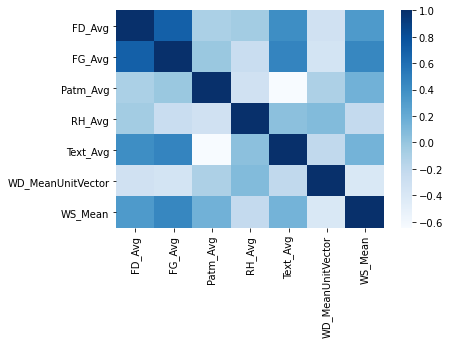

In [20]:
sns.heatmap(test.corr(), cmap='Blues')

##### On remarque qu'il y a une correlation moyenne  entre plusieurs attributs mais principalement entre FG_avg et FD_avg, FG_Avg et Patm_avg ainsi entre test_avg et RH_avg, Patm_avg et Ws_mean, patm_avg et fd_avg, ws_mean et fd_avg , wd_meanUnitvector et RH_avg, wd_meanUnitvector et FG_avg, wd_meanUnitvector et Fd_avg. Donc, on ne peut pas exprimer un attribut en fonction d'un autre ou l'éliminer car ils sont faiblement corrélés et donc on va les garder dans notre analyse.

#### On va ajouter quelque attributs, comme mois, année et appliquer un modèle de régression linéaire(test data) et decision tree et ensemble methode sur data sans enlever les outliers car ils ne sont pas sensitive aux outliers pour prédire FG_avg enfin analyser les résultats

In [21]:
df = data.reset_index()

In [22]:
df = df.resample('H', on ='Timestamp').agg({'FD_Avg':'sum', 'FG_Avg':'sum', 'Patm_Avg':'sum', 'RH_Avg':'sum', 'Text_Avg':'sum', 'WD_MeanUnitVector':'sum', 'WS_Mean':'sum'})

In [23]:
df.head()

,FD_Avg,FG_Avg,Patm_Avg,RH_Avg,Text_Avg,WD_MeanUnitVector,WS_Mean
Timestamp,,,,,,,
2014-01-01 00:00:00,222.374,223.913,58369.4981,4190.13328,1473.69998,6030.34121,288.533336
2014-01-01 01:00:00,181.128,176.645,58340.8983,3512.01653,1522.13329,7163.53591,195.816665
2014-01-01 02:00:00,352.397,337.947,58329.1824,3585.09987,1503.43327,6754.40726,241.766671
2014-01-01 03:00:00,208.763,202.348,58352.8649,3691.63319,1496.56665,8137.30350,283.716670
2014-01-01 04:00:00,208.243,253.511,58345.0990,3706.56656,1525.19999,7915.26230,260.033334


In [24]:
df = df.reset_index()

In [25]:
df.head()

,Timestamp,FD_Avg,FG_Avg,Patm_Avg,RH_Avg,Text_Avg,WD_MeanUnitVector,WS_Mean
0,2014-01-01 00:00:00,222.374,223.913,58369.4981,4190.13328,1473.69998,6030.34121,288.533336
1,2014-01-01 01:00:00,181.128,176.645,58340.8983,3512.01653,1522.13329,7163.53591,195.816665
2,2014-01-01 02:00:00,352.397,337.947,58329.1824,3585.09987,1503.43327,6754.40726,241.766671
3,2014-01-01 03:00:00,208.763,202.348,58352.8649,3691.63319,1496.56665,8137.30350,283.716670
4,2014-01-01 04:00:00,208.243,253.511,58345.0990,3706.56656,1525.19999,7915.26230,260.033334


In [26]:
df["month"] = df["Timestamp"].dt.month

In [27]:
import calendar

In [28]:
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])

In [29]:
df["year"] = df["Timestamp"].dt.year

In [30]:
df["day"] = df["Timestamp"].dt.day_name()

In [31]:
df['hour'] = df['Timestamp'].dt.hour

In [32]:
df.head()

,Timestamp,FD_Avg,FG_Avg,Patm_Avg,RH_Avg,Text_Avg,WD_MeanUnitVector,WS_Mean,month,year,day,hour
0,2014-01-01 00:00:00,222.374,223.913,58369.4981,4190.13328,1473.69998,6030.34121,288.533336,Jan,2014,Wednesday,0
1,2014-01-01 01:00:00,181.128,176.645,58340.8983,3512.01653,1522.13329,7163.53591,195.816665,Jan,2014,Wednesday,1
2,2014-01-01 02:00:00,352.397,337.947,58329.1824,3585.09987,1503.43327,6754.40726,241.766671,Jan,2014,Wednesday,2
3,2014-01-01 03:00:00,208.763,202.348,58352.8649,3691.63319,1496.56665,8137.30350,283.716670,Jan,2014,Wednesday,3
4,2014-01-01 04:00:00,208.243,253.511,58345.0990,3706.56656,1525.19999,7915.26230,260.033334,Jan,2014,Wednesday,4


In [33]:
df2 = test.reset_index()

In [34]:
df2 = df2.resample('H', on ='Timestamp').agg({'FD_Avg':'mean', 'FG_Avg':'mean', 'Patm_Avg':'mean', 'RH_Avg':'mean', 'Text_Avg':'mean', 'WD_MeanUnitVector':'mean', 'WS_Mean':'mean'})

In [35]:
df2.head()

,FD_Avg,FG_Avg,Patm_Avg,RH_Avg,Text_Avg,WD_MeanUnitVector,WS_Mean
Timestamp,,,,,,,
2014-01-01 00:00:00,3.706233,3.731883,972.824968,69.835555,24.561666,100.505687,4.808889
2014-01-01 01:00:00,3.018800,2.944083,972.348305,58.533609,25.368888,119.392265,3.263611
2014-01-01 02:00:00,5.873283,5.632450,972.153040,59.751665,25.057221,112.573454,4.029445
2014-01-01 03:00:00,3.479383,3.372467,972.547748,61.527220,24.942777,135.621725,4.728611
2014-01-01 04:00:00,3.470717,4.225183,972.418317,61.776109,25.420000,131.921038,4.333889


In [36]:
df2 = df2.reset_index()

In [37]:
df2["month"] = df2["Timestamp"].dt.month

In [38]:
df2['month'] = df2['month'].apply(lambda x: calendar.month_abbr[x])

In [39]:
df2["year"] = df2["Timestamp"].dt.year

In [40]:
df2["day"] = df2["Timestamp"].dt.day_name()

In [41]:
df2['hour'] = df2['Timestamp'].dt.hour

In [42]:
df2.head()

,Timestamp,FD_Avg,FG_Avg,Patm_Avg,RH_Avg,Text_Avg,WD_MeanUnitVector,WS_Mean,month,year,day,hour
0,2014-01-01 00:00:00,3.706233,3.731883,972.824968,69.835555,24.561666,100.505687,4.808889,Jan,2014,Wednesday,0
1,2014-01-01 01:00:00,3.018800,2.944083,972.348305,58.533609,25.368888,119.392265,3.263611,Jan,2014,Wednesday,1
2,2014-01-01 02:00:00,5.873283,5.632450,972.153040,59.751665,25.057221,112.573454,4.029445,Jan,2014,Wednesday,2
3,2014-01-01 03:00:00,3.479383,3.372467,972.547748,61.527220,24.942777,135.621725,4.728611,Jan,2014,Wednesday,3
4,2014-01-01 04:00:00,3.470717,4.225183,972.418317,61.776109,25.420000,131.921038,4.333889,Jan,2014,Wednesday,4


## Traitement des data sans outliers

<AxesSubplot:>

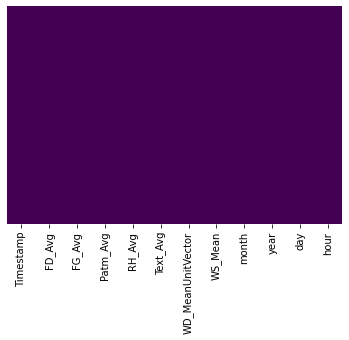

In [43]:
sns.heatmap(df.isna(), yticklabels = False, cbar = False, cmap='viridis')
## pas de valeur manquante car on a appliqué la somme

<AxesSubplot:>

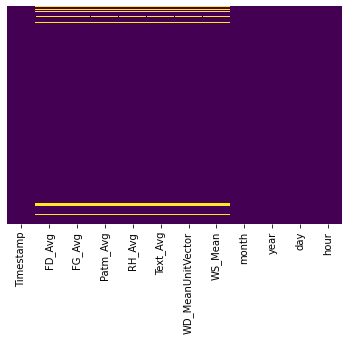

In [44]:
sns.heatmap(df2.isna(), yticklabels = False, cbar = False, cmap='viridis')
##il ya des valeurs manquantes, car on a appliqué la moyenne et la division de quelques valeurs très petites négligeable par un nombre assez grand(+1million) tend vers 'infini'

In [45]:
df2.isna().sum()

Timestamp              0
FD_Avg               763
FG_Avg               763
Patm_Avg             763
RH_Avg               763
Text_Avg             763
WD_MeanUnitVector    763
WS_Mean              763
month                  0
year                   0
day                    0
hour                   0
dtype: int64

#### les valeurs manquantes sont présentes dans: toutes les variables numériques sauf timestamp, month, year,day et hour

<AxesSubplot:>

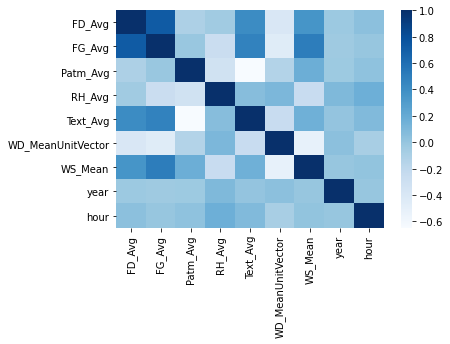

In [46]:
sns.heatmap(df2.corr(), cmap = 'Blues')

#### On remarque qu'il y a une forte correlation entre FG_avg et FD_avg ensuite, entre fg_avg et text_avg, fg_avg et ws_mean , fd_avg et ws_mean , text_avg et fd_avg et aussi le reste des attributs mais assez faible. Donc pour imputer les valeurs manquantes on va utiliser un imputer qui prend en considération les autres variables qui va prédire les valeurs manquantes en appliquant un modèle de régression. C'est le IterativeImputer.

#### Avant ceci on va supprimer la colonne de Timestamp car on a déja extrait les données necessaire à savoir l'année, le mois, le jour et l'heure.

In [48]:
df.drop(columns = 'Timestamp', inplace = True) 

In [49]:
df2.drop(columns = 'Timestamp', inplace = True) 

In [50]:
df.head()

,FD_Avg,FG_Avg,Patm_Avg,RH_Avg,Text_Avg,WD_MeanUnitVector,WS_Mean,month,year,day,hour
0,222.374,223.913,58369.4981,4190.13328,1473.69998,6030.34121,288.533336,Jan,2014,Wednesday,0
1,181.128,176.645,58340.8983,3512.01653,1522.13329,7163.53591,195.816665,Jan,2014,Wednesday,1
2,352.397,337.947,58329.1824,3585.09987,1503.43327,6754.40726,241.766671,Jan,2014,Wednesday,2
3,208.763,202.348,58352.8649,3691.63319,1496.56665,8137.30350,283.716670,Jan,2014,Wednesday,3
4,208.243,253.511,58345.0990,3706.56656,1525.19999,7915.26230,260.033334,Jan,2014,Wednesday,4


In [51]:
df2.head()

,FD_Avg,FG_Avg,Patm_Avg,RH_Avg,Text_Avg,WD_MeanUnitVector,WS_Mean,month,year,day,hour
0,3.706233,3.731883,972.824968,69.835555,24.561666,100.505687,4.808889,Jan,2014,Wednesday,0
1,3.018800,2.944083,972.348305,58.533609,25.368888,119.392265,3.263611,Jan,2014,Wednesday,1
2,5.873283,5.632450,972.153040,59.751665,25.057221,112.573454,4.029445,Jan,2014,Wednesday,2
3,3.479383,3.372467,972.547748,61.527220,24.942777,135.621725,4.728611,Jan,2014,Wednesday,3
4,3.470717,4.225183,972.418317,61.776109,25.420000,131.921038,4.333889,Jan,2014,Wednesday,4


In [52]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer

In [53]:
ohe = OneHotEncoder()
impute = IterativeImputer()
scale = StandardScaler(with_mean=False)

In [54]:
ct = make_column_transformer(
            (ohe,["month", 'year', 'day', 'hour']),
            (impute, ['FD_Avg', 'FG_Avg', 'Patm_Avg', 'RH_Avg', 'Text_Avg', 'WD_MeanUnitVector', 'WS_Mean']),
            remainder = 'passthrough')

In [55]:
X = ct.fit_transform(df2)

In [56]:
df2.head()

,FD_Avg,FG_Avg,Patm_Avg,RH_Avg,Text_Avg,WD_MeanUnitVector,WS_Mean,month,year,day,hour
0,3.706233,3.731883,972.824968,69.835555,24.561666,100.505687,4.808889,Jan,2014,Wednesday,0
1,3.018800,2.944083,972.348305,58.533609,25.368888,119.392265,3.263611,Jan,2014,Wednesday,1
2,5.873283,5.632450,972.153040,59.751665,25.057221,112.573454,4.029445,Jan,2014,Wednesday,2
3,3.479383,3.372467,972.547748,61.527220,24.942777,135.621725,4.728611,Jan,2014,Wednesday,3
4,3.470717,4.225183,972.418317,61.776109,25.420000,131.921038,4.333889,Jan,2014,Wednesday,4


In [57]:
ct3 = make_column_transformer(
                (scale, [45,47,48,49,50,51]),
                remainder = 'passthrough')

In [58]:
x = ct3.fit_transform(X)

In [59]:
t = x.toarray()

In [60]:
pd.DataFrame(t).head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,0.030776,246.045436,7.559455,10.441749,1.574007,2.787845,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.731883
1,0.025067,245.924879,6.336059,10.784919,1.869788,1.892005,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.944083
2,0.048770,245.875492,6.467909,10.652421,1.762999,2.335980,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.632450
3,0.028892,245.975322,6.660107,10.603769,2.123955,2.741306,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.372467
4,0.028820,245.942586,6.687048,10.806647,2.065999,2.512475,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.225183


<AxesSubplot:>

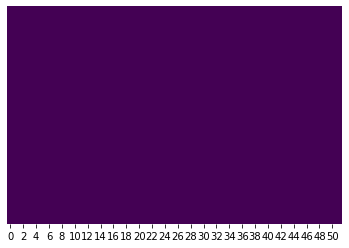

In [61]:
sns.heatmap(pd.DataFrame(t).isna(),yticklabels = False, cbar = False, cmap='viridis')

#### Comme on voit, on n'a plus de valeures manquantes ainsi on peut appliquer les modèles de régression pour prédire FG_avg

In [62]:
pd.DataFrame(t).head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,0.030776,246.045436,7.559455,10.441749,1.574007,2.787845,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.731883
1,0.025067,245.924879,6.336059,10.784919,1.869788,1.892005,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.944083
2,0.048770,245.875492,6.467909,10.652421,1.762999,2.335980,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.632450
3,0.028892,245.975322,6.660107,10.603769,2.123955,2.741306,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.372467
4,0.028820,245.942586,6.687048,10.806647,2.065999,2.512475,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.225183


In [63]:
df2.head()

,FD_Avg,FG_Avg,Patm_Avg,RH_Avg,Text_Avg,WD_MeanUnitVector,WS_Mean,month,year,day,hour
0,3.706233,3.731883,972.824968,69.835555,24.561666,100.505687,4.808889,Jan,2014,Wednesday,0
1,3.018800,2.944083,972.348305,58.533609,25.368888,119.392265,3.263611,Jan,2014,Wednesday,1
2,5.873283,5.632450,972.153040,59.751665,25.057221,112.573454,4.029445,Jan,2014,Wednesday,2
3,3.479383,3.372467,972.547748,61.527220,24.942777,135.621725,4.728611,Jan,2014,Wednesday,3
4,3.470717,4.225183,972.418317,61.776109,25.420000,131.921038,4.333889,Jan,2014,Wednesday,4


In [64]:
dat = pd.DataFrame(t)

In [65]:
Y = dat[51] #la variable cible est '51' qui correspond à FG_avg

In [66]:
Y.head()

0    3.731883
1    2.944083
2    5.632450
3    3.372467
4    4.225183
Name: 51, dtype: float64

In [67]:
dat.drop(columns = 51, inplace = True )

In [68]:
X = dat

In [69]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,0.030776,246.045436,7.559455,10.441749,1.574007,2.787845,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.025067,245.924879,6.336059,10.784919,1.869788,1.892005,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.048770,245.875492,6.467909,10.652421,1.762999,2.335980,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.028892,245.975322,6.660107,10.603769,2.123955,2.741306,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.028820,245.942586,6.687048,10.806647,2.065999,2.512475,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X.shape

(17497, 51)

In [72]:
Y.shape

(17497,)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(Y), test_size = 0.2, random_state =42 )  

In [74]:
from lazypredict.Supervised import LazyRegressor

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
print(models)

 21%|█████████████████▊                                                                 | 9/42 [00:18<02:19,  4.21s/it]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 74%|████████████████████████████████████████████████████████████▌                     | 31/42 [04:11<00:56,  5.11s/it]

PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range for family PoissonDistribution


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [04:58<00:00,  7.11s/it]

                                        Adjusted R-Squared  \
Model                                                        
ExtraTreesRegressor                                   0.94   
MLPRegressor                                          0.93   
HistGradientBoostingRegressor                         0.93   
LGBMRegressor                                         0.93   
RandomForestRegressor                                 0.93   
XGBRegressor                                          0.92   
BaggingRegressor                                      0.92   
GradientBoostingRegressor                             0.89   
DecisionTreeRegressor                                 0.85   
ExtraTreeRegressor                                    0.84   
LinearRegression                                      0.79   
TransformedTargetRegressor                            0.79   
BayesianRidge                                         0.79   
RidgeCV                                               0.79   
Ridge   

## Conclusion 1: data sans outliers
### On remarque que le meilleur modèle de régression pour ces données sans outliers, est extra trees regressor qui est une méthode d'ensemble dont les estimateurs sont des arbres de décisions et suivie par MLP regressor qui est un modèle de perceptron. On remarque que les 10 premiers meilleurs modèles avec une valeur élevé de R^2  de valeur qui atteint 94% au maximum, sont des méthodes d'ensemble par contre la regression linéaire a un score faible de 79% comparée au méthode d'ensemble donc nous pouvons conclure que les méthodes d'ensemble sont meilleurs car ils utilisent plusieurs estimateurs au lieu d'un seul estimateur pour le reste des modèles.

## Traitement des Data avec outliers

<AxesSubplot:>

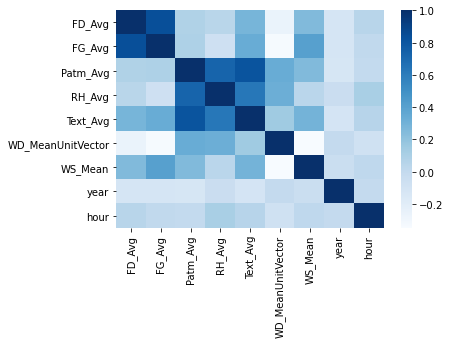

In [47]:
sns.heatmap(df.corr(), cmap = 'Blues')#data sans outliers

### On remarque qu'il y a une forte correlation entre FG_avg et FD_avg, patm_avg et RH_avg, patm_avg et text_avg, text_avg et RH_avg. Les autres correlations reste relativement faibles.

In [75]:
ct2 = make_column_transformer(
            (ohe,["month", 'year', 'day', 'hour']),
            (scale, ['FD_Avg', 'Patm_Avg', 'RH_Avg', 'Text_Avg', 'WD_MeanUnitVector', 'WS_Mean']),
            remainder = 'passthrough')

In [76]:
df.head()

,FD_Avg,FG_Avg,Patm_Avg,RH_Avg,Text_Avg,WD_MeanUnitVector,WS_Mean,month,year,day,hour
0,222.37,223.91,58369.50,4190.13,1473.70,6030.34,288.53,Jan,2014,Wednesday,0
1,181.13,176.64,58340.90,3512.02,1522.13,7163.54,195.82,Jan,2014,Wednesday,1
2,352.40,337.95,58329.18,3585.10,1503.43,6754.41,241.77,Jan,2014,Wednesday,2
3,208.76,202.35,58352.86,3691.63,1496.57,8137.30,283.72,Jan,2014,Wednesday,3
4,208.24,253.51,58345.10,3706.57,1525.20,7915.26,260.03,Jan,2014,Wednesday,4


In [77]:
X2 = ct2.fit_transform(df)

In [78]:
pd.DataFrame(X2.toarray())

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.02,6.43,5.04,5.81,1.46,2.57,223.91
1,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.02,6.43,4.22,6.00,1.73,1.75,176.64
2,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.03,6.43,4.31,5.92,1.63,2.16,337.95
3,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.02,6.43,4.44,5.90,1.97,2.53,202.35
4,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.02,6.43,4.46,6.01,1.92,2.32,253.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17492,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.02,6.43,4.89,5.54,1.53,2.99,248.24
17493,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.02,6.44,4.57,5.52,1.46,3.70,256.30
17494,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,1.00,0.00,0.02,6.44,4.37,5.56,1.72,2.72,228.71
17495,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.02,6.44,4.73,5.41,1.65,2.70,289.11


In [79]:
d = pd.DataFrame(X2.toarray())

In [80]:
Y2 = d[51]
d.drop(columns = 51, inplace = True)

In [81]:
X_train, X_test, y_train, y_test = train_test_split(np.array(d), np.array(Y2), test_size = 0.2, random_state =42 )  

In [82]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
print(models)

 21%|█████████████████▊                                                                 | 9/42 [00:18<01:53,  3.45s/it]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 74%|████████████████████████████████████████████████████████████▌                     | 31/42 [04:03<00:49,  4.49s/it]

PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range for family PoissonDistribution


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [04:52<00:00,  6.96s/it]

                                     Adjusted R-Squared  \
Model                                                     
ExtraTreesRegressor                                0.96   
RandomForestRegressor                              0.96   
LGBMRegressor                                      0.96   
HistGradientBoostingRegressor                      0.95   
XGBRegressor                                       0.95   
BaggingRegressor                                   0.95   
GradientBoostingRegressor                          0.93   
DecisionTreeRegressor                              0.91   
ExtraTreeRegressor                                 0.89   
KNeighborsRegressor                                0.85   
BayesianRidge                                      0.83   
Lasso                                              0.83   
RidgeCV                                            0.83   
Ridge                                              0.83   
LassoCV                                            0.83 

## Conclusion 2: Data avec outliers
### On remaque que le meilleur modèle sur ces données avec les outliers est extra tree regressor avec un score de 96% suivi de random forest avec le même score ainsi les meilleurs modèles sont ceux des méthodes d'ensemble par contre toujours la régression linéaire est avec un score plus petit que les méthodes d'ensemble qui est de 83%. Donc aussi dans ce cas plusieux estimateurs sont meilleurs qu'un seul estimateur.

## Conclusion: 
### On remaque que malgré l'impacte des outliers sur les résultats en général, on a mené une double étude des data une en gardant les outliers et une autre en les éliminant. Mais les résultats obtenus montre que les méthodes d'ensemble ont de meilleurs performances que les modèles simple avec un seul estimateur comme la régression linéaire. Par contre le score de R^2 est plus élevé sur les data avec les outliers que les data sans outliers, et on peut conclure que ceci est dû à une perte d'information car on a éliminé les outliers qui fait environ 3.06 des données initiales. Finalement, on dis que l'élimination des outliers n'est pas toujours une bonne idée et on peut contourner ce problème en utilisant l'isolation des foret qui va être traitée dans la partie suivante.